# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [ ]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

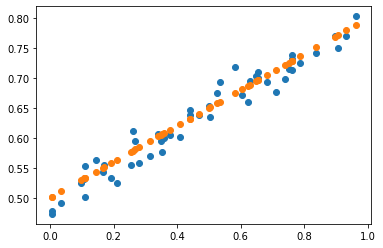

In [ ]:
n = 50 # number of examples

xs = [random.random() for _ in range(n)] # features
ys = list(map(g, xs)) # targets

ts = list(map(f, xs)) # we don't get to see this

plt.scatter(xs, ys)
plt.scatter(xs, ts)

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

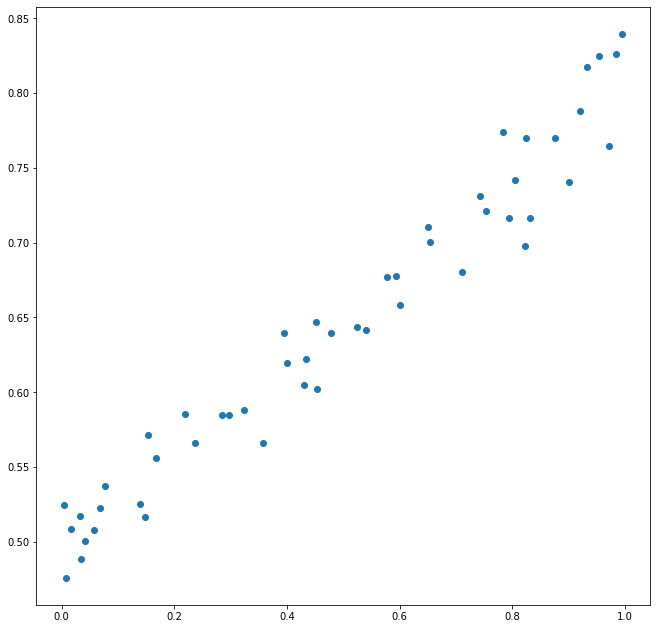

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [ ]:
def l2_loss(ys, ps):
    assert len(ys) == len(ps)
    result = 0
    for i in range(len(ys)):
      result += (ys[i] - ps[i]) ** 2
    result /= len(ys)
    return result

Please take a while to (roughly) guess the output before executing the cell below.

In [ ]:
l2_loss(ys, ts)

0.00037010160463982726

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [ ]:
a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

def derivative_a(ys, ps, xs):
  assert len(ys) == len(ps)
  result = 0
  for i in range(len(ys)):
    result += (ps[i] - ys[i]) * xs[i]
  result /= len(xs) / 2
  return result

def derivative_b(ys, ps):
  assert len(ys) == len(ps)
  result = 0
  for i in range(len(ys)):
    result += (ps[i] - ys[i])
  result /= len(ys) / 2
  return result


losses = [evaluate(a, b)]

for i in range(n_epochs):
    pred = predict(a, b)
    a = a - lr * derivative_a(ys, pred, xs)
    b = b - lr * derivative_b(ys, pred)
    loss = evaluate(a, b)
    losses.append(loss)
    
    print('Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b))

Iter:   0 Loss: 0.02194780 a:  0.31657, b:  0.63401
Iter:   1 Loss: 0.00162441 a:  0.24775, b:  0.48702
Iter:   2 Loss: 0.00054121 a:  0.26697, b:  0.51898
Iter:   3 Loss: 0.00046887 a:  0.26582, b:  0.51006
Iter:   4 Loss: 0.00045130 a:  0.26914, b:  0.51059
Iter:   5 Loss: 0.00043816 a:  0.27126, b:  0.50905
Iter:   6 Loss: 0.00042665 a:  0.27349, b:  0.50806
Iter:   7 Loss: 0.00041645 a:  0.27554, b:  0.50703
Iter:   8 Loss: 0.00040741 a:  0.27748, b:  0.50608
Iter:   9 Loss: 0.00039940 a:  0.27930, b:  0.50518
Iter:  10 Loss: 0.00039229 a:  0.28101, b:  0.50433
Iter:  11 Loss: 0.00038600 a:  0.28263, b:  0.50353
Iter:  12 Loss: 0.00038042 a:  0.28415, b:  0.50278
Iter:  13 Loss: 0.00037547 a:  0.28558, b:  0.50208
Iter:  14 Loss: 0.00037108 a:  0.28693, b:  0.50141
Iter:  15 Loss: 0.00036720 a:  0.28820, b:  0.50079
Iter:  16 Loss: 0.00036375 a:  0.28939, b:  0.50020
Iter:  17 Loss: 0.00036070 a:  0.29052, b:  0.49964
Iter:  18 Loss: 0.00035799 a:  0.29158, b:  0.49912
Iter:  19 Lo

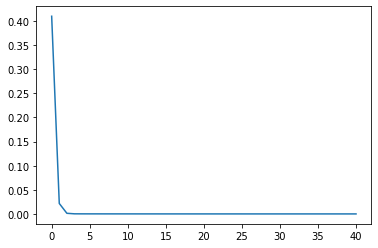

In [ ]:
plt.plot(losses)

Let's now visually asses how we do on training data

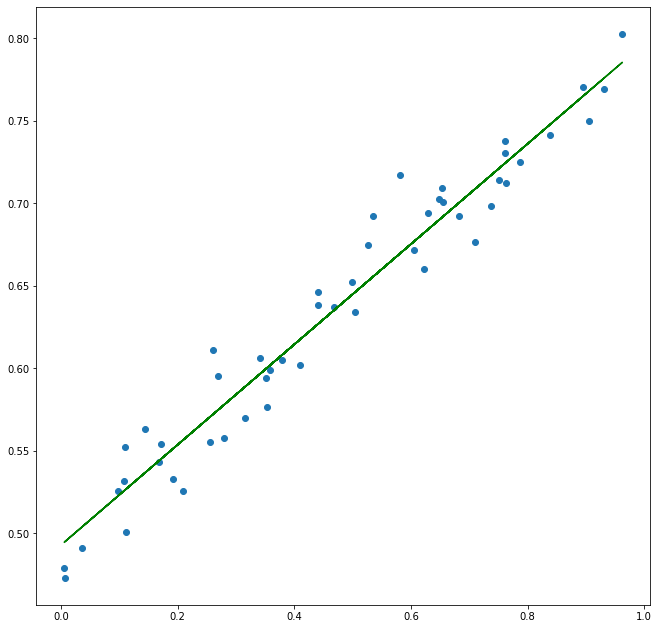

In [ ]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

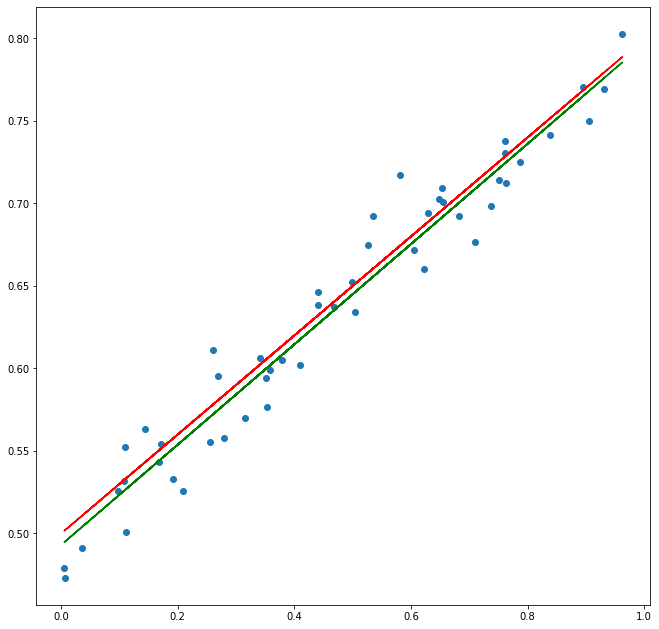

In [ ]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.plot(xs, ts, c='r')

################################################################
# TODO: Add the (unobserved) ground truth, i.e. ts to the plot #
################################################################

plt.show()

Let's check our implementation vs. the one in sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print('Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(sk_loss, sk_a, sk_b))

Loss: 0.00028547 a:  0.29505, b:  0.49890
